# Project: Investigate a Dataset - TMDb-Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
<li><a href="#rq1">Research Question 1</a></li>
<li><a href="#rq2">Research Question 2</a></li>
<li><a href="#rq3">Research Question 3</a></li>
<li><a href="#rq4">Research Question 4</a></li>
<li><a href="#rq5">Research Question 5</a></li>
<li><a href="#rq6">Research Question 6</a></li>
<li><a href="#rq7">Research Question 7</a></li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis

- #### Highest grossing Primary Director?
- #### Which film was the highest profitting for the top 20 highest profiting Primary Directors?
- #### What is the average popularity score for each Primary Director?
- #### Which film was the highest popularity score for the Primary Directors?
- #### What was the highest rated genre vs the highest profitting genre? 
- #### What was the highest rated genre per director vs highest profitting genre per director?
- #### When reviewing all the dataframes showing the top Directors using various metrics how frequently does each Director appear in the top 20?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import timedelta,date as dt
import difflib
import plotly.express as px
from wordcloud import WordCloud
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [3]:
df.tail().sort_values(by='release_date')

id    imdb_id  popularity  budget  revenue  \
10863  39768  tt0060161    0.065141       0        0   
10865  22293  tt0060666    0.035919   19000        0   
10864  21449  tt0061177    0.064317       0        0   
10862  20379  tt0060472    0.065543       0        0   
10861     21  tt0060371    0.080598       0        0   

                 original_title  \
10863       Beregis Avtomobilya   
10865  Manos: The Hands of Fate   
10864    What's Up, Tiger Lily?   
10862                Grand Prix   
10861        The Endless Summer   

                                                    cast homepage  \
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...      NaN   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...      NaN   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...      NaN   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...      NaN   
10861  Michael Hynson|Robert August|Lord 'Tally Ho' B...      NaN   

                 director                                            tagline  \
10863      Eldar Ryazanov                                                NaN   
10865    Harold P. Warren       It's Shocking! It's Beyond Your Imagination!   
10864         Woody Allen                          WOODY ALLEN STRIKES BACK!   
10862  John Frankenheimer  Cinerama sweeps YOU into a drama of speed and ...   
10861         Bruce Brown                                                NaN   

       ...                                           overview runtime  \
10863  ...  An insurance agent who moonlights as a carthie...      94   
10865  ...  A family gets lost on the road and stumbles up...      74   
10864  ...  In comic Woody Allen's film debut, he took the...      80   
10862  ...  Grand Prix driver Pete Aron is fired by his te...     176   
10861  ...  The Endless Summer, by Bruce Brown, is one of ...      95   

                       genres  \
10863          Mystery|Comedy   
10865                  Horror   
10864           Action|Comedy   
10862  Action|Adventure|Drama   
10861             Documentary   

                                    production_companies release_date  \
10863                                            Mosfilm       1/1/66   
10865                                          Norm-Iris     11/15/66   
10864                            Benedict Pictures Corp.      11/2/66   
10862  Cherokee Productions|Joel Productions|Douglas ...     12/21/66   
10861                                  Bruce Brown Films      6/15/66   

      vote_count  vote_average  release_year     budget_adj  revenue_adj  
10863         11           6.5          1966       0.000000          0.0  
10865         15           1.5          1966  127642.279154          0.0  
10864         22           5.4          1966       0.000000          0.0  
10862         20           5.7          1966       0.000000          0.0  
10861         11           7.4          1966       0.000000          0.0  

[5 rows x 21 columns]

### Reviewing dataset: 
Column count, row count, missing data, duplicate data, questions to ask, unneeded columns.  
Potentially remove columns: 
 - homepage
 - tagline
 - keywords
 - overview
 - imdb_id
 - budget_adj
 - revenue_adj

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Out of needed series the following Missing Data needs to be considered:
- production_companies 9836/10866
- genres 10843/10866
- cast 10790/10866


In [5]:
sum(df.duplicated())

1

In [6]:
type(df['release_date'][0])

str

### Data Cleaning
 

>Removing/Dropping series that are not needed to analyze the questions.

In [7]:
df.drop(['homepage', 'tagline', 'keywords', 'overview', 'runtime','imdb_id', 'budget_adj', 'revenue_adj'
         ,'vote_average','release_year','vote_count'], axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   director              10822 non-null  object 
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 849.0+ KB


In [8]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [9]:
df.describe()

id    popularity        budget       revenue
count   10865.000000  10865.000000  1.086500e+04  1.086500e+04
mean    66066.374413      0.646446  1.462429e+07  3.982690e+07
std     92134.091971      1.000231  3.091428e+07  1.170083e+08
min         5.000000      0.000065  0.000000e+00  0.000000e+00
25%     10596.000000      0.207575  0.000000e+00  0.000000e+00
50%     20662.000000      0.383831  0.000000e+00  0.000000e+00
75%     75612.000000      0.713857  1.500000e+07  2.400000e+07
max    417859.000000     32.985763  4.250000e+08  2.781506e+09

changing the release date into a date in order to review varying uses of the date. 

In [10]:
def fix_date(x):
    if x.year > 2022:
        year = x.year - 100
    else:
        year = x.year
    return pd.datetime(year,x.month,x.day)

df['release_date'] =  pd.to_datetime(df['release_date'])
df['release_date'] = df['release_date'].apply(fix_date)

/var/folders/wf/_x5mxls94p92t_39895yg9pm0000gq/T/ipykernel_26325/1207862680.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime(year,x.month,x.day)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   budget                10865 non-null  int64         
 3   revenue               10865 non-null  int64         
 4   original_title        10865 non-null  object        
 5   cast                  10789 non-null  object        
 6   director              10821 non-null  object        
 7   genres                10842 non-null  object        
 8   production_companies  9835 non-null   object        
 9   release_date          10865 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 933.7+ KB


>Split the cast and production into seperate columns, then drop the original columns. 

In [12]:
df[['actor1','actor2','actor3','actor4','actor5']] = df.cast.str.split(pat='|', expand = True)
df.drop(['cast'],axis=1,inplace=True)

In [13]:
df[['production_company1','production_company2','production_company3','production_company4',
    'production_company5']] = df.production_companies.str.split(pat='|',expand=True)
df.drop(['production_companies'],axis=1,inplace=True)


> Considering/Assuming the first genre listed in the string to be the 'primary' genre. 

In [14]:
df['primary_genre'] = df['genres'].str.split('|').str[0]

Only review the first 2 directors, split into 2 different columns. 
> Considering/Assuming the first Director listed in the string is the Primary Director. 

In [15]:
df['director_primary'] = df['director'].str.split('|').str[0]
df['director_secondary'] = df['director'].str.split('|').str[1]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   10865 non-null  int64         
 1   popularity           10865 non-null  float64       
 2   budget               10865 non-null  int64         
 3   revenue              10865 non-null  int64         
 4   original_title       10865 non-null  object        
 5   director             10821 non-null  object        
 6   genres               10842 non-null  object        
 7   release_date         10865 non-null  datetime64[ns]
 8   actor1               10789 non-null  object        
 9   actor2               10645 non-null  object        
 10  actor3               10555 non-null  object        
 11  actor4               10446 non-null  object        
 12  actor5               10133 non-null  object        
 13  production_company1  9835 non-n

> Merge the cast and production colums together into lists. 

In [16]:
# Merge and covnert to lists in order to be easily iteratted through
df['cast_list'] = df[df.columns[8:13]].values.tolist()
df['prod_companies_list'] = df[df.columns[13:18]].values.tolist()

In [17]:
# Drop the multiple actor and production company columns only leaving `cast_list` and `prod_companies_list`
df.drop(['actor1','actor2','actor3','actor4','actor5',
         'production_company1', 'production_company2', 'production_company3', 
         'production_company4', 'production_company5', 'director'], axis=1, inplace=True)

In [18]:
# Create a `profit` column
df['profit'] = df['revenue'].subtract(df['budget'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   10865 non-null  int64         
 1   popularity           10865 non-null  float64       
 2   budget               10865 non-null  int64         
 3   revenue              10865 non-null  int64         
 4   original_title       10865 non-null  object        
 5   genres               10842 non-null  object        
 6   release_date         10865 non-null  datetime64[ns]
 7   primary_genre        10842 non-null  object        
 8   director_primary     10821 non-null  object        
 9   director_secondary   754 non-null    object        
 10  cast_list            10865 non-null  object        
 11  prod_companies_list  10865 non-null  object        
 12  profit               10865 non-null  int64         
dtypes: datetime64[ns](1), float64(1

In [20]:
df.describe()

id    popularity        budget       revenue        profit
count   10865.000000  10865.000000  1.086500e+04  1.086500e+04  1.086500e+04
mean    66066.374413      0.646446  1.462429e+07  3.982690e+07  2.520261e+07
std     92134.091971      1.000231  3.091428e+07  1.170083e+08  9.659103e+07
min         5.000000      0.000065  0.000000e+00  0.000000e+00 -4.139124e+08
25%     10596.000000      0.207575  0.000000e+00  0.000000e+00  0.000000e+00
50%     20662.000000      0.383831  0.000000e+00  0.000000e+00  0.000000e+00
75%     75612.000000      0.713857  1.500000e+07  2.400000e+07  9.092453e+06
max    417859.000000     32.985763  4.250000e+08  2.781506e+09  2.544506e+09

Getting inflation adjustment to ensure review of the profit takes into consideration the value of the money during the time the 'revenue - budget = profit' was logged.  

In [21]:
# Define a function to get inflation rates from the BLS API
def get_inflation_rates(start_year, end_year):
    base_url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'
    series_id = 'CUUR0000SA0'
    headers = {'Content-type': 'application/json'}
    data = '{"seriesid":["' + series_id + '"],"startyear":"' + str(start_year) + '","endyear":"' + str(end_year) + '"}'
    response = requests.post(base_url, headers=headers, data=data)
    json_data = response.json()['Results']['series'][0]['data']
    inflation_rates = {int(d['year']): float(d['value']) for d in json_data}
    return inflation_rates

# Get the inflation rates for the years in the DataFrame
start_year = df['release_date'].min().year
end_year = df['release_date'].max().year
inflation_rates = get_inflation_rates(start_year, end_year)

# Define a function to adjust for inflation using the CPI
def adjust_for_inflation(amount, year):
    cpi_year = min(year, max(inflation_rates.keys()))
    cpi = inflation_rates[cpi_year]
    latest_cpi_year = max(inflation_rates.keys())
    latest_cpi = inflation_rates[latest_cpi_year]
    
    # Calculate the inflation factor based on the latest CPI
    inflation_factor = latest_cpi / cpi
    adjusted_amount = amount * inflation_factor
    
    return adjusted_amount  

# Apply the inflation adjustment to the profit column
df['profit_infl_adj'] = df.apply(lambda x: adjust_for_inflation(x['profit'], x['release_date'].year), axis=1)


In [22]:
df['profit_infl_adj'] = df['profit_infl_adj'].astype(int)

In [23]:
df.tail(50)

id  popularity    budget   revenue  \
10816  16378    0.064602         0         0   
10817  13963    0.064029         0    321952   
10818  39995    0.047645         0         0   
10819  16214    0.044675         0  78000000   
10820  13377    1.227582    315000         0   
10821   1714    0.929393         0         0   
10822    396    0.670274   7500000  33736689   
10823   3591    0.613444         0         0   
10824   2525    0.533292  18000000         0   
10825   1052    0.509263         0         0   
10826    874    0.418900         0         0   
10827   2661    0.410366   1377800         0   
10828   5780    0.402730   3000000  13000000   
10829   6644    0.395668   4653000   6000000   
10830   4772    0.380321         0         0   
10831   1888    0.529721         0         0   
10832  23030    0.358161   4800000         0   
10833   3001    0.737730         0         0   
10834  12639    0.310688         0         0   
10835   5923    0.299911  12000000  20000000   
10836  38720    0.239435         0         0   
10837  19728    0.291704         0         0   
10838  22383    0.151845         0         0   
10839  13353    0.276133         0         0   
10840  34388    0.102530         0         0   
10841  42701    0.264925     75000         0   
10842  36540    0.253437         0         0   
10843  29710    0.252399         0         0   
10844  23728    0.236098         0         0   
10845   5065    0.230873         0         0   
10846  17102    0.212716         0         0   
10847  28763    0.034555         0         0   
10848   2161    0.207257   5115000  12000000   
10849  28270    0.206537         0         0   
10850  26268    0.202473         0         0   
10851  15347    0.342791         0         0   
10852  37301    0.227220         0         0   
10853  15598    0.163592         0         0   
10854  31602    0.146402         0         0   
10855  13343    0.141026    700000         0   
10856  20277    0.140934         0         0   
10857   5921    0.131378         0         0   
10858  31918    0.317824         0         0   
10859  20620    0.089072         0         0   
10860   5060    0.087034         0         0   
10861     21    0.080598         0         0   
10862  20379    0.065543         0         0   
10863  39768    0.065141         0         0   
10864  21449    0.064317         0         0   
10865  22293    0.035919     19000         0   

                                         original_title  \
10816                  The Rutles: All You Need Is Cash   
10817                                    The Last Waltz   
10818                                      Long Weekend   
10819                                            Hooper   
10820                   How the Grinch Stole Christmas!   
10821                                    Fahrenheit 451   
10822                   Who's Afraid of Virginia Woolf?   
10823                            One Million Years B.C.   
10824                    The Bible: In the Beginning...   
10825                                           Blow-Up   
10826                             A Man for All Seasons   
10827                                            Batman   
10828                                      Torn Curtain   
10829                                         El Dorado   
10830                                        Cul-de-sac   
10831                                The Fortune Cookie   
10832                                         Arabesque   
10833                            How to Steal a Million   
10834                               Return of the Seven   
10835                                  The Sand Pebbles   
10836                                    Walk Don't Run   
10837                                      The Blue Max   
10838                                 The Professionals   
10839             It's the Great Pumpkin, Charlie Brown   
10840                                 Funeral in Berlin   
10841                      

<a id='eda'></a>
## Exploratory Data Analysis


### Comparing the top Directors in the following fields to eachother:
- Highest Profit Total
- Highest Profit Average Per Film
- Highest Popularity Score Average Per Director
- Highest Rated (Popularity) Genre
- Highest Profit Per Genre
- Highest Rated (Popularity) Genre Per Director 
- Highest Profit Per Genre Per Director
> Comparing to see if there are corrolations or changes on which Directors are in the top 20 depending on the metric used to messure. Are there consistency and commonalities? 


<a id='rq1'></a>
### Research Question 1 - Highest grossing Primary Director?

- Grouping by Director to get an aggregated list. 
- Finding total made by displaying the sum of the revenue for all the films a director made minus the sum of the budget (ie profit. 
- Using the profit amount adjusted for inflation.

In [24]:
# Used a mask in order to limit views to films with a release date of 2000-01-01 or later. 
mask = (df['release_date'] >= '2000-01-01')

In [25]:
date_mask = df.loc[mask]

In [26]:
by_pd = date_mask.groupby(['director_primary'],sort=False).aggregate({'profit_infl_adj':['sum','count']})

# Flatten column names
by_pd.columns = ['total_profit', 'film_count']

# Sort the values in descending order
sorted_bypd = by_pd.sort_values(by='total_profit', ascending=False)

# Reset index and add a new index
top_2000 = sorted_bypd.reset_index()

# Rename the columns
top_2000.columns = ['director_primary', 'total_profit', 'film_count'] 

top_2000[:20]

director_primary  total_profit  film_count
0       Peter Jackson    5202593685           8
1         David Yates    3379295625           5
2   Christopher Nolan    3162548502           8
3         J.J. Abrams    2839169916           5
4         Michael Bay    2760938960           8
5    Steven Spielberg    2659994241          11
6       James Cameron    2548546718           3
7    Francis Lawrence    2476979588           6
8         Joss Whedon    2424263144           5
9      Gore Verbinski    2271362290           8
10          Sam Raimi    2254066354           6
11    Carlos Saldanha    2169451792           5
12       Ridley Scott    2109601581          13
13     Andrew Adamson    1991859447           6
14     Chris Columbus    1888968952           6
15          James Wan    1813662186           8
16         Tim Burton    1801663457          10
17         Sam Mendes    1708252208           6
18          Brad Bird    1581913958           5
19         Shawn Levy    1515787063          11

> Created the same group by and aggregation for the whole data set in order to see the differences when taking into account movies prior to 2000. 

In [27]:
by_pd2 = df.groupby(['director_primary'],sort=False).aggregate({'profit_infl_adj':['sum','count']})
by_pd2.columns = ['total_profit', 'film_count']

sorted_bypd = by_pd2.sort_values(by='total_profit', ascending=False)

top_all_time = sorted_bypd.reset_index()
top_all_time.columns = ['director_primary', 'total_profit', 'film_count'] 

top_all_time[:20]

director_primary  total_profit  film_count
0    Steven Spielberg    7428613772          29
1       Peter Jackson    5196468949          13
2       James Cameron    5081849077          11
3         Michael Bay    3557208171          11
4         David Yates    3379295625           5
5      Chris Columbus    3224491668          14
6   Christopher Nolan    3162548502          10
7        George Lucas    2955996893           6
8     Robert Zemeckis    2843990869          17
9         J.J. Abrams    2839169916           5
10         Tim Burton    2629549685          20
11   Francis Lawrence    2476979588           6
12        Joss Whedon    2424263144           5
13    Roland Emmerich    2406825574          11
14     Gore Verbinski    2355779679           9
15         Ron Howard    2274471847          22
16          Sam Raimi    2240870360          14
17    Carlos Saldanha    2169451792           5
18       Ridley Scott    2167096480          23
19         Sam Mendes    2049548809           7

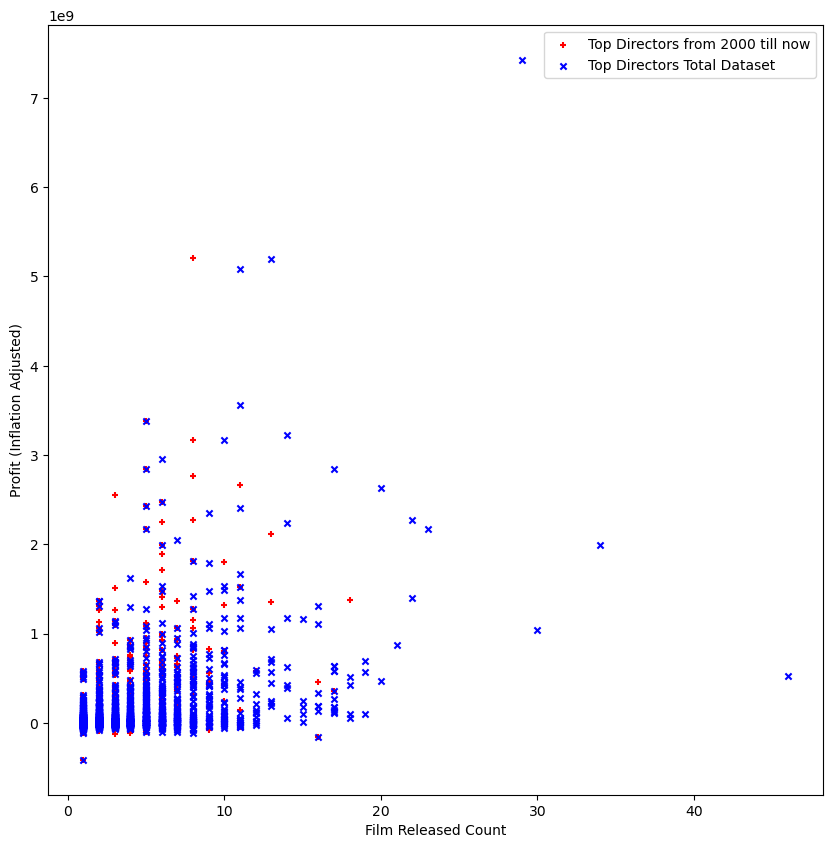

In [28]:
ax = top_2000.plot.scatter(x='film_count', y='total_profit',
                           label='Top Directors from 2000 till now', 
                           color='r', marker='+', figsize=(10,10))
top_all_time.plot.scatter(x='film_count', y='total_profit',
                          label='Top Directors Total Dataset', 
                          color='b', marker='x', ax=ax, figsize=(10,10))
# set the x and y-axis labels
ax.set_xlabel('Film Released Count')
ax.set_ylabel('Profit (Inflation Adjusted)')

# show the plot
plt.show()

When reviewing the scatter plot we can see that the profit (inflation adjusted) is higher for those with between 8-15 films released vs those with 15 or more. 

In [29]:
# Looking at the mean of `profit_infl_adj` in the `top_all_time`. 
top_all_time['profit_avg_per_film'] = top_all_time['total_profit'] / top_all_time['film_count']
top_all_time['profit_avg_per_film'] = top_all_time['profit_avg_per_film'].astype(int)
top_all_time[:20]

director_primary  total_profit  film_count  profit_avg_per_film
0    Steven Spielberg    7428613772          29            256159095
1       Peter Jackson    5196468949          13            399728380
2       James Cameron    5081849077          11            461986279
3         Michael Bay    3557208171          11            323382561
4         David Yates    3379295625           5            675859125
5      Chris Columbus    3224491668          14            230320833
6   Christopher Nolan    3162548502          10            316254850
7        George Lucas    2955996893           6            492666148
8     Robert Zemeckis    2843990869          17            167293580
9         J.J. Abrams    2839169916           5            567833983
10         Tim Burton    2629549685          20            131477484
11   Francis Lawrence    2476979588           6            412829931
12        Joss Whedon    2424263144           5            484852628
13    Roland Emmerich    2406825574          11            218802324
14     Gore Verbinski    2355779679           9            261753297
15         Ron Howard    2274471847          22            103385083
16          Sam Raimi    2240870360          14            160062168
17    Carlos Saldanha    2169451792           5            433890358
18       Ridley Scott    2167096480          23             94221586
19         Sam Mendes    2049548809           7            292792687

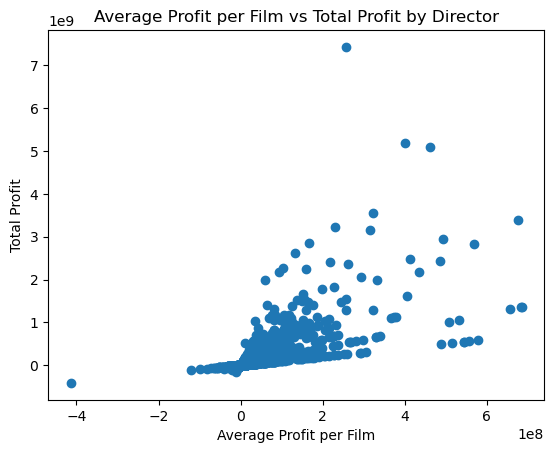

In [30]:
# Scatter plot to show the relationship between average profit per film and total profit for each director
plt.scatter(top_all_time['profit_avg_per_film'], top_all_time['total_profit'])

# Set the axis labels and title
plt.xlabel('Average Profit per Film')
plt.ylabel('Total Profit')
plt.title('Average Profit per Film vs Total Profit by Director')

plt.show()

In [31]:
top_all_time = top_all_time[:50]

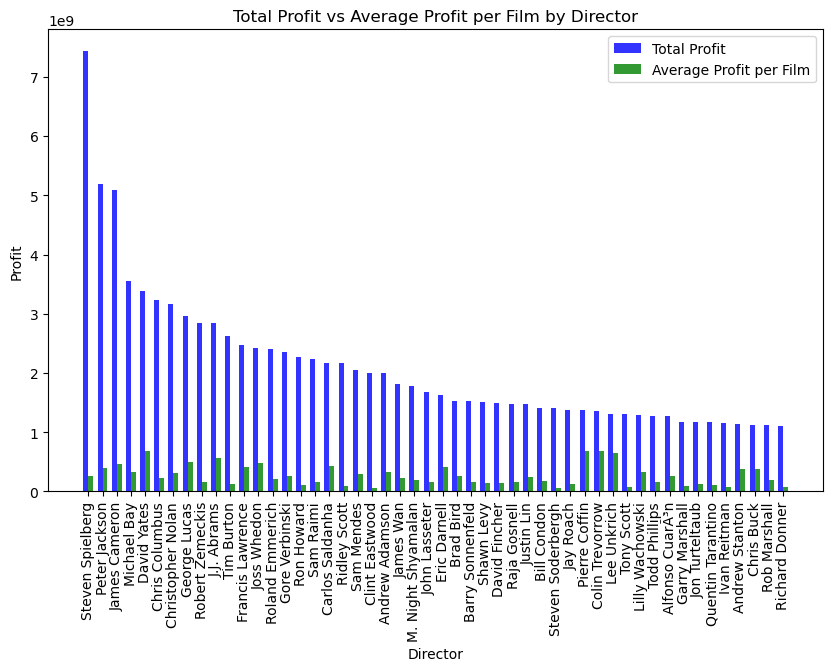

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
opacity = 0.8
index = list(range(len(top_all_time)))

# Bar for total profit
total_profit_bar = ax.bar(index, top_all_time['total_profit'], bar_width,
                          alpha=opacity,
                          color='b',
                          label='Total Profit')

# Bar for average profit per film
avg_profit_bar = ax.bar([i + bar_width for i in index], top_all_time['profit_avg_per_film'], bar_width,
                        alpha=opacity,
                        color='g',
                        label='Average Profit per Film')

# Add labels and title
ax.set_xlabel('Director')
ax.set_ylabel('Profit')
ax.set_title('Total Profit vs Average Profit per Film by Director')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(top_all_time.director_primary, rotation=90)

# Add legend
ax.legend()

plt.show()

The director Steven Spoelberg has they highest total profit but one of the lowest profit averages per film. 

<a id='rq2'></a>
### Research Question 2  - Which film was the highest profitting for the top 20 highest profiting Primary Directors?

In [33]:
# Group data by director_primary column and apply agg function
high_low = df.groupby('director_primary').agg({
    'profit_infl_adj': ['max', 'min'], 
    'original_title': ['first', 'last']
})

# Rename columns
high_low.columns = ['highest_profit', 'lowest_profit', 'first_title', 'last_title']

# Show the result
high_low_by_director = high_low.sort_values(by='highest_profit', ascending=False)[:20]

high_low_by_director = high_low_by_director.reset_index()
high_low_by_director.columns = ['director_primary', 'highest_profit', 'lowest_profit', 'first_title', 'last_title'] 

high_low_by_director['difference_profit'] = (high_low_by_director['highest_profit']-high_low_by_director['lowest_profit'])

high_low_by_director

director_primary  highest_profit  lowest_profit  \
0       James Cameron      2544505847        -145786   
1         J.J. Abrams      1868178225      210095987   
2     Colin Trevorrow      1363528810        3257792   
3           James Wan      1316249360       -5000000   
4         Joss Whedon      1299557910        -199997   
5         David Yates      1202817822              0   
6          Chris Buck      1124219009              0   
7       Irwin Winkler      1084279658      -20000000   
8          Kyle Balda      1082730962              0   
9       Peter Jackson      1024888979       -2757377   
10        Shane Black      1015439994         785148   
11        Michael Bay       928746996       35500000   
12         Sam Mendes       908561013       -2100583   
13      Pierre Coffin       894761885      474513985   
14     Gore Verbinski       865659812     -165710090   
15        Lee Unkrich       863171911      447816256   
16   Steven Spielberg       857100000      -38000000   
17     Chris Columbus       851475550      -18000000   
18  Christopher Nolan       831041287              0   
19         Tim Burton       825467110      -12112543   

                                  first_title  \
0                                      Avatar   
1                Star Wars: The Force Awakens   
2                              Jurassic World   
3                                   Furious 7   
4                     Avengers: Age of Ultron   
5      Harry Potter and the Half-Blood Prince   
6                                Frozen Fever   
7                              At First Sight   
8                                     Minions   
9   The Hobbit: The Battle of the Five Armies   
10                                 Iron Man 3   
11            Transformers: Age of Extinction   
12                                    Spectre   
13                              Despicable Me   
14                                The Mexican   
15                                Toy Story 3   
16                            Bridge of Spies   
17                                     Pixels   
18                               Interstellar   
19                                   Big Eyes   

                                   last_title  difference_profit  
0                                      Aliens         2544651633  
1                     Mission: Impossible III         1658082238  
2                       Safety Not Guaranteed         1360271018  
3                                Dead Silence         1321249360  
4                                    Serenity         1299757907  
5   Harry Potter and the Order of the Phoenix         1202817822  
6                                      Frozen         1124219009  
7                                     The Net         1104279658  
8                    Minions: Orientation Day         1082730962  
9                                   Bad Taste         1027646356  
10                        Kiss Kiss Bang Bang         1014654846  
11                                 Armageddon          893246996  
12                                    Jarhead          910661596  
13                            Despicable Me 2          420247900  
14   Pirates of the Caribbean: At World's End         1031369902  
15                             Monsters, Inc.          415355655  
16                              Jurassic Park          895100000  
17                             Mrs. Doubtfire          869475550  
18                                  Following          831041287  
19                        Edward Scissorhands          837579653

<a id='rq3'></a>
### Research Question 3 - What is the average popularity score for each Primary Director?


In [34]:
pop_d = df.groupby(['director_primary'],sort=False).aggregate({'popularity':['mean','count']})
pop_d.columns = ['avg_pop_score', 'film_count']

sorted_popd = pop_d.sort_values(by='avg_pop_score', ascending=False)

pop_by_director = sorted_popd.reset_index()
pop_by_director.columns = ['director_primary', 'avg_pop_score', 'film_count'] 

pop_by_director[:20]

director_primary  avg_pop_score  film_count
0                  Colin Trevorrow      16.696886           2
1                        Joe Russo      12.971027           1
2                   Chad Stahelski      11.422751           1
3                         Don Hall       8.691294           1
4                    Juno John Lee       8.411577           1
5                      Alan Taylor       6.883129           2
6                 Peter Richardson       6.668990           1
7                Christopher Nolan       6.195521          10
8                     Alex Garland       6.118847           1
9               Patrick Tatopoulos       5.806897           1
10                        Wes Ball       5.553082           2
11                      Dan Gilroy       5.522641           1
12                      James Gunn       5.225378           3
13                    Bob Peterson       4.908902           1
14                     J.J. Abrams       4.800957           5
15  Alejandro GonzÃ¡lez IÃ±Ã¡rritu       4.793536           4
16                 Damien Chazelle       4.780419           1
17                 Lilly Wachowski       4.618540           4
18                   Morten Tyldum       4.485181           2
19                Francis Lawrence       4.437604           6

<a id='rq4'></a>
### Research Question 4 - Which film was the highest popularity score for the Primary Directors?

In [35]:
# Group data by director_primary column and apply agg function
high_low_pd = df.groupby('director_primary').agg({'popularity': ['max', 'min'], 
                                                  'original_title': ['first', 'last']})

# Rename columns
high_low_pd.columns = ['highest_pop_score', 'lowest_pop_score', 'first_title', 'last_title']

# Show the result
high_low_pop_score = high_low_pd.sort_values(by='highest_pop_score', ascending=False)

high_low_pop_score = high_low_pop_score.reset_index()
high_low_pop_score.columns = ['director_primary', 
                              'highest_pop_score', 'lowest_pop_score', 
                              'first_title', 'last_title'] 

high_low_pop_score[:20]

director_primary  highest_pop_score  lowest_pop_score  \
0                  Colin Trevorrow          32.985763          0.408010   
1                    George Miller          28.419936          0.234375   
2                Christopher Nolan          24.949134          0.168542   
3                       James Gunn          14.311205          0.443893   
4                 Robert Schwentke          13.112507          0.719502   
5                        Joe Russo          12.971027         12.971027   
6                     George Lucas          12.037933          0.627942   
7                   Chad Stahelski          11.422751         11.422751   
8                      J.J. Abrams          11.173104          2.026717   
9                 Francis Lawrence          10.739009          0.530139   
10                   Peter Jackson          10.174599          0.257575   
11                   James Cameron           9.432768          0.107123   
12                       James Wan           9.335014          0.121449   
13  Alejandro GonzÃ¡lez IÃ±Ã¡rritu           9.110700          0.995361   
14                   David Fincher           8.947905          1.464555   
15                        Don Hall           8.691294          8.691294   
16                     Alan Taylor           8.654359          5.111900   
17                   Juno John Lee           8.411577          8.411577   
18                   Morten Tyldum           8.110711          0.859651   
19               Quentin Tarantino           8.093754          0.068199   

                                  first_title  \
0                              Jurassic World   
1                          Mad Max: Fury Road   
2                                Interstellar   
3                     Guardians of the Galaxy   
4                                   Insurgent   
5         Captain America: The Winter Soldier   
6                                   Star Wars   
7                                   John Wick   
8                Star Wars: The Force Awakens   
9       The Hunger Games: Mockingjay - Part 2   
10  The Hobbit: The Battle of the Five Armies   
11                                     Avatar   
12                                  Furious 7   
13                               The Revenant   
14                                  Gone Girl   
15                                 Big Hero 6   
16                         Terminator Genisys   
17                    Underworld: Endless War   
18                         The Imitation Game   
19                          The Hateful Eight   

                             last_title  
0                 Safety Not Guaranteed  
1               The Witches of Eastwick  
2                             Following  
3                               Slither  
4                            Flightplan  
5   Captain America: The Winter Soldier  
6                     American Graffiti  
7                             John Wick  
8               Mission: Impossible III  
9                           I Am Legend  
10                            Bad Taste  
11                               Aliens  
12                         Dead Silence  
13                                Babel  
14                              AlienÂ³  
15                           Big Hero 6  
16                 Thor: The Dark World  
17              Underworld: Endless War  
18                          Hodejegerne  
19            My Best Friend's Birthday

<a id='rq5'></a>
### Research Question 5 - What was the highest rated genre vs the highest profitting genre? 

In [36]:
pop_g = df.groupby(['primary_genre'],sort=False).aggregate({'popularity':['mean','count'], 
                                                    'profit_infl_adj':['mean','sum']})
pop_g.columns = ['avg_pop_score', 'film_count', 'avg_profit', 'total_profit']

sorted_popg = pop_g.sort_values(by='film_count', ascending=False)

pop_by_genre = sorted_popg.reset_index()
pop_by_genre.columns = ['genre', 'avg_pop_score', 'film_count', 'avg_profit', 'total_profit'] 

pop_by_genre['avg_profit'] = pop_by_genre['avg_profit'].astype(int)

pop_by_genre[:20]

genre  avg_pop_score  film_count  avg_profit  total_profit
0             Drama       0.552446        2453    14841566   36406363265
1            Comedy       0.537133        2319    18942255   43927089590
2            Action       0.836394        1590    36137085   57457966621
3            Horror       0.468611         915    11252127   10295697004
4         Adventure       1.217868         586    84697982   49633017910
5          Thriller       0.673381         491    14298067    7020350975
6       Documentary       0.177023         432     1541884     666094035
7         Animation       0.810370         403    49964205   20135574623
8             Crime       0.694063         380    20073052    7627759781
9           Fantasy       0.865390         272    43845207   11925896450
10  Science Fiction       1.073096         214    54553770   11674506804
11          Romance       0.704157         186    26752217    4975912468
12           Family       0.730987         144    43249754    6227964609
13          Mystery       0.596896         125    14058904    1757363038
14            Music       0.447730         100    12634381    1263438100
15         TV Movie       0.246190          78      288461      22500000
16              War       0.767041          59    23076573    1361517861
17          History       0.764636          44    28426094    1250748175
18          Western       0.690646          42    11759709     493907807
19          Foreign       0.167124           9           0             0

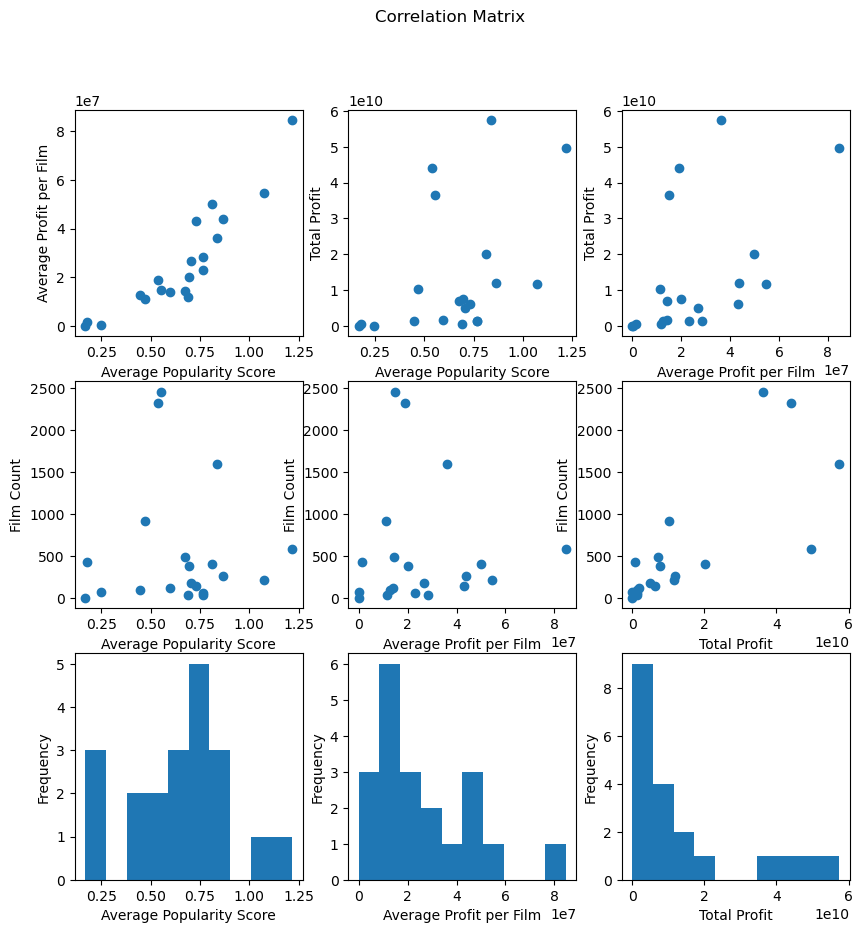

In [37]:
# Scatter plot matrix
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Correlation Matrix')

# Scatter plot for avg_pop_score vs avg_profit
axs[0, 0].scatter(pop_by_genre['avg_pop_score'], pop_by_genre['avg_profit'])
axs[0, 0].set_xlabel('Average Popularity Score')
axs[0, 0].set_ylabel('Average Profit per Film')

# Scatter plot for avg_pop_score vs total_profit
axs[0, 1].scatter(pop_by_genre['avg_pop_score'], pop_by_genre['total_profit'])
axs[0, 1].set_xlabel('Average Popularity Score')
axs[0, 1].set_ylabel('Total Profit')

# Scatter plot for avg_profit vs total_profit
axs[0, 2].scatter(pop_by_genre['avg_profit'], pop_by_genre['total_profit'])
axs[0, 2].set_xlabel('Average Profit per Film')
axs[0, 2].set_ylabel('Total Profit')

# Scatter plot for avg_pop_score vs film_count
axs[1, 0].scatter(pop_by_genre['avg_pop_score'], pop_by_genre['film_count'])
axs[1, 0].set_xlabel('Average Popularity Score')
axs[1, 0].set_ylabel('Film Count')

# Scatter plot for avg_profit vs film_count
axs[1, 1].scatter(pop_by_genre['avg_profit'], pop_by_genre['film_count'])
axs[1, 1].set_xlabel('Average Profit per Film')
axs[1, 1].set_ylabel('Film Count')

# Scatter plot for total_profit vs film_count
axs[1, 2].scatter(pop_by_genre['total_profit'], pop_by_genre['film_count'])
axs[1, 2].set_xlabel('Total Profit')
axs[1, 2].set_ylabel('Film Count')

# Histogram for avg_pop_score
axs[2, 0].hist(pop_by_genre['avg_pop_score'])
axs[2, 0].set_xlabel('Average Popularity Score')
axs[2, 0].set_ylabel('Frequency')

# Histogram for avg_profit
axs[2, 1].hist(pop_by_genre['avg_profit'])
axs[2, 1].set_xlabel('Average Profit per Film')
axs[2, 1].set_ylabel('Frequency')

# Histogram for total_profit
axs[2, 2].hist(pop_by_genre['total_profit'])
axs[2, 2].set_xlabel('Total Profit')
axs[2, 2].set_ylabel('Frequency')

plt.show()


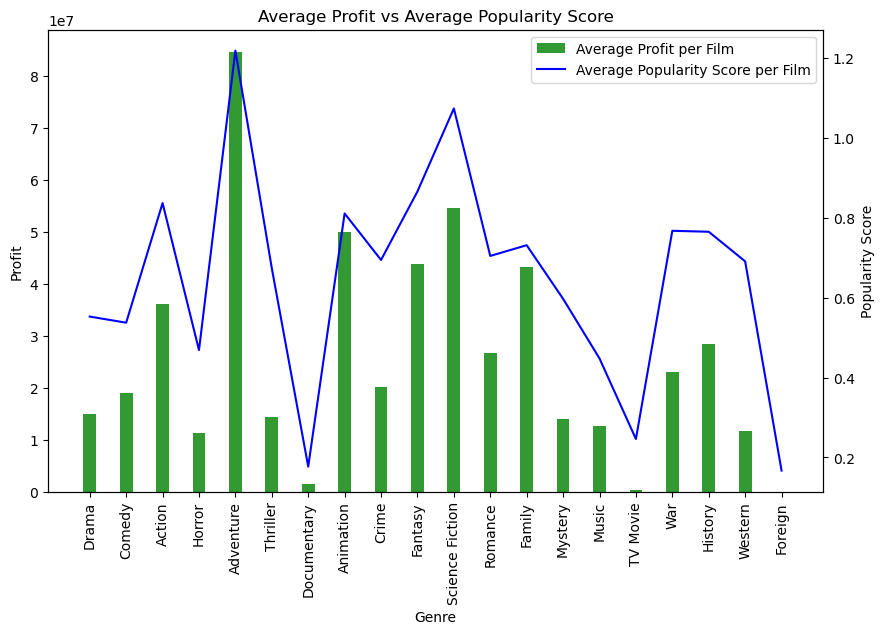

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
opacity = 0.8
index = list(range(len(pop_by_genre)))

# Bar for average profit per film
avg_profit_bar = ax.bar(index, pop_by_genre['avg_profit'], bar_width,
                        alpha=opacity,
                        color='g',
                        label='Average Profit per Film')

# Labels and title
ax.set_xlabel('Genre')
ax.set_ylabel('Profit')
ax.set_title('Average Profit vs Average Popularity Score')
ax.set_xticks(index)
ax.set_xticklabels(pop_by_genre.genre, rotation=90)

# Create a twin axis for the popularity score line
ax2 = ax.twinx()

# Plot the popularity score data on the secondary y-axis
pop_score_line = ax2.plot(index, pop_by_genre['avg_pop_score'], color='b', label='Average Popularity Score per Film')

# Set the secondary y-axis label
ax2.set_ylabel('Popularity Score')

# Add legend for both axes
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)

plt.show()

The average profit per film in each genre seems to be closely connected to the average popularity score for each genre. The only genres that have a significantly higher popularity score than the profit are 'War, History, and Westerns'. 

<a id='rq6'></a>
### Research Question 6 - What was the highest rated genre per director vs highest profitting genre per director?

In [39]:
director_genre_group = df.groupby(['director_primary', 'primary_genre']).agg({
    'popularity': 'mean',
    'release_date': 'count',
    'profit': ['mean', 'sum']
}).reset_index()

director_genre_group.columns = ['director', 'genre', 'avg_pop_score', 'film_count', 'avg_profit', 'total_profit']

sorted_dgg = director_genre_group.sort_values(by='film_count', ascending=False)

sorted_dgg

director   genre  avg_pop_score  film_count    avg_profit  \
7476      Woody Allen  Comedy       0.540958          28  7.122946e+06   
4590  Martin Scorsese   Drama       1.203987          17  3.362827e+07   
2408    Gerald Thomas  Comedy       0.158687          12  0.000000e+00   
5996       Rob Reiner  Comedy       0.771106          12  1.784869e+07   
6710   Stephen Frears   Drama       0.347140          12  8.919586e+06   
...               ...     ...            ...         ...           ...   
2798       Jack Perez  Horror       0.187796           1  0.000000e+00   
2797       Jack Perez   Crime       0.781151           1 -2.800000e+06   
2796       Jack Perez  Comedy       0.072612           1 -3.000000e+05   
2795   Jack Nicholson   Crime       0.255318           1 -9.000000e+06   
7561     Ã€lex Pastor  Action       0.619369           1  5.802422e+06   

      total_profit  
7476     199442475  
4590     571680618  
2408             0  
5996     214184223  
6710     107035029  
...            ...  
2798             0  
2797      -2800000  
2796       -300000  
2795      -9000000  
7561       5802422  

[7562 rows x 6 columns]

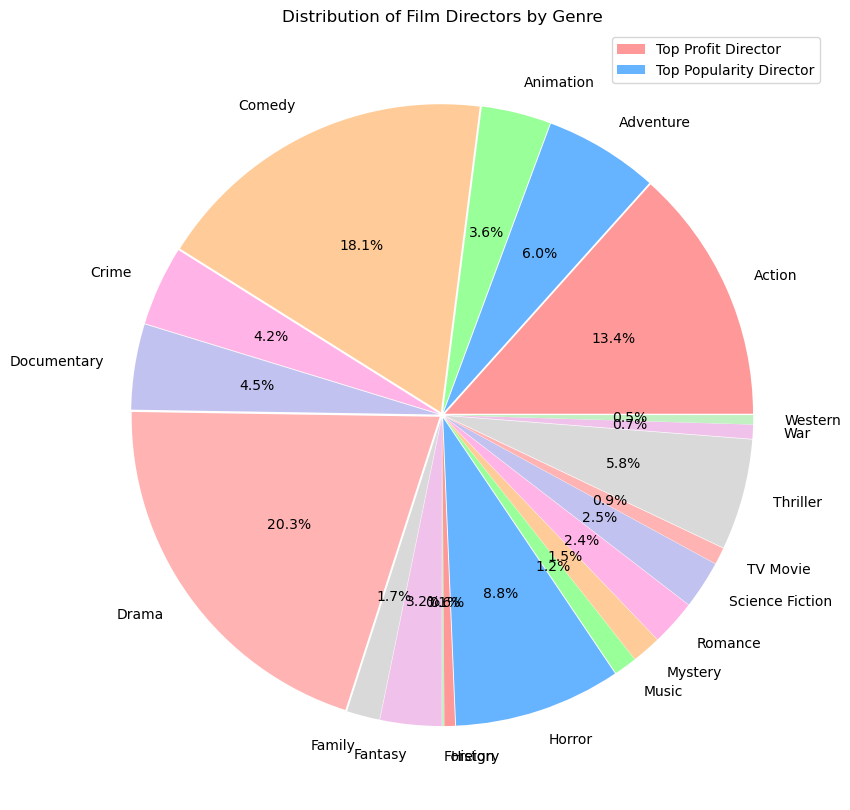

In [40]:
# group by genre and count how many directors had a film in each genre
genre_counts = sorted_dgg.groupby('genre')['director'].nunique()

# group by genre and find the director with the highest avg profit and highest avg pop score for each genre
top_profit_directors = sorted_dgg.groupby('genre').apply(lambda x: x.loc[x['avg_profit'].idxmax(), 'director'])
top_pop_directors = sorted_dgg.groupby('genre').apply(lambda x: x.loc[x['avg_pop_score'].idxmax(), 'director'])

# create a pie chart
fig, ax = plt.subplots(figsize=(12, 10))

# set the colors and explode values
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ffb3e6','#c2c2f0','#ffb3b3','#d9d9d9','#f0c2eb','#c2f0c2']
explode = [0.01] * len(genre_counts)

# create the pie chart
ax.pie(genre_counts, labels=genre_counts.index, colors=colors, explode=explode, autopct='%1.1f%%')

# add title and legend
ax.set_title('Distribution of Film Directors by Genre')
ax.legend(loc='best', labels=['Top Profit Director', 'Top Popularity Director'])

plt.show()

In [41]:
pivot_table = pd.pivot_table(director_genre_group, values=['avg_pop_score', 'avg_profit','total_profit'], index=['genre'], aggfunc={
    'avg_pop_score': lambda x: director_genre_group.loc[x.idxmax(), 'director'],
    'avg_profit': lambda x: director_genre_group.loc[x.idxmax(), 'director'],
    'total_profit': lambda x: director_genre_group.loc[x.idxmax(), 'director']
})

Within some of the genres the director with the highest average popularity score is also the director with the highest average profit. Reviewing for percent of directors who are listed in all 3 columns (avg_pop_score, avg_profit, and total_profit) for each genre. 

In [42]:
def get_similarity_ratio(s1, s2):
    return difflib.SequenceMatcher(None, s1, s2).ratio()

def check_all_three(row):
    dir1 = row['avg_pop_score']
    dir2 = row['avg_profit']
    dir3 = row['total_profit']
    similarity = get_similarity_ratio(dir1, dir2)
    if similarity >= 0.7:
        return 100 if dir1 == dir2 == dir3 else 0
    else:
        return 0

In [43]:
pivot_table['percent_directors_all_three'] = pivot_table.apply(check_all_three, axis=1)

pivot_table['percent_directors_2_of_3'] = pivot_table.apply(lambda x: 
    100 if ((x['avg_pop_score'] == x['avg_profit'] and x['avg_pop_score'] != x['total_profit']) or 
            (x['avg_pop_score'] == x['total_profit'] and x['avg_pop_score'] != x['avg_profit']) or 
            (x['avg_profit'] == x['total_profit'] and x['avg_profit'] != x['avg_pop_score'])) 
    else 0, axis=1)

pivot_table

avg_pop_score  \
genre                                             
Action                          Colin Trevorrow   
Adventure                     Christopher Nolan   
Animation                            Chris Buck   
Comedy                         Peter Richardson   
Crime                           Olivier Megaton   
Documentary                  Stephanie Soechtig   
Drama                              Alex Garland   
Family                               Kyle Balda   
Fantasy                          MÃ¥ns MÃ¥rlind   
Foreign                         Peter Greenaway   
History                           Morten Tyldum   
Horror                             Ridley Scott   
Music                             Anne Fletcher   
Mystery                           David Fincher   
Romance                         Kenneth Branagh   
Science Fiction                     Alan Taylor   
TV Movie                              Jack Gold   
Thriller                      Quentin Tarantino   
War                                  David Ayer   
Western          Alejandro GonzÃ¡lez IÃ±Ã¡rritu   

                                     avg_profit  \
genre                                             
Action                          Colin Trevorrow   
Adventure                           David Yates   
Animation                            Chris Buck   
Comedy                              Pete Docter   
Crime                             Irwin Winkler   
Documentary                          Jon M. Chu   
Drama                             James Cameron   
Family                               Kyle Balda   
Fantasy                            Chris Miller   
Foreign                             Emad Burnat   
History                             Michael Bay   
Horror                              Adrian Lyne   
Music                            Emile Ardolino   
Mystery                      M. Night Shyamalan   
Romance                          Garry Marshall   
Science Fiction                    George Lucas   
TV Movie                           Geoffrey Sax   
Thriller                           Mick Jackson   
War                            Francis Lawrence   
Western          Alejandro GonzÃ¡lez IÃ±Ã¡rritu   

                                   total_profit  percent_directors_all_three  \
genre                                                                          
Action                            James Cameron                            0   
Adventure                         Peter Jackson                            0   
Animation                       Carlos Saldanha                            0   
Comedy                            Todd Phillips                            0   
Crime                             Irwin Winkler                            0   
Documentary                       Michael Moore                            0   
Drama                          Steven Spielberg                            0   
Family                               Kyle Balda                          100   
Fantasy                               Sam Raimi                            0   
Foreign                             Emad Burnat                            0   
History                             Michael Bay                            0   
Horror                                James Wan                            0   
Music                             George Miller                            0   
Mystery                      M. Night Shyamalan                            0   
Romance                          Garry Marshall                            0   
Science Fiction                Francis Lawrence                            0   
TV Movie                           Geoffrey Sax                            0   
Thriller                             Ron Howard                            0   
War                            Francis Lawrence                            0   
Western          Alejandro GonzÃ¡lez IÃ±Ã¡rritu                          100   

                 percent_di

In [44]:
percent_all_three = pivot_table['percent_directors_all_three'].mean()
percent_2_of_3 = pivot_table[pivot_table['percent_directors_all_three'] == 0]['percent_directors_2_of_3'].mean()

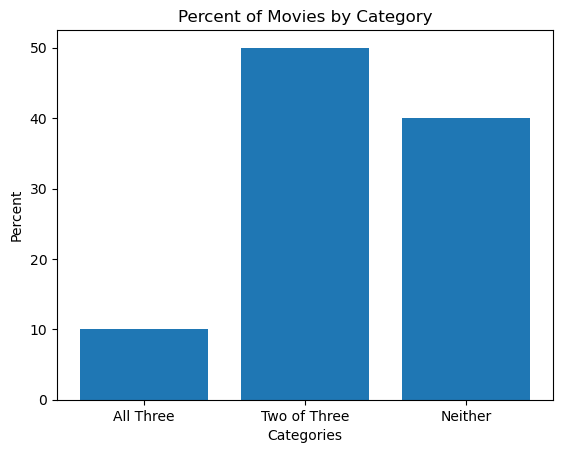

In [45]:
y_values = [percent_all_three, percent_2_of_3, 100 - percent_all_three - percent_2_of_3]

x_values = ['All Three', 'Two of Three', 'Neither']

plt.bar(x_values, y_values)

plt.xlabel('Categories')
plt.ylabel('Percent')
plt.title('Percent of Movies by Category')

plt.show()

Out of the 20 different genres only 2 directors were listed in all 3 categories for a single genre. 
The catagories avg_pop_score = Averge Popularity Score, avg_profit = Average Profit, and total_profit = Total Profit. This indicates rarely were directors the Top in all 3 categories and when they were it was in less saturated genres. 
Less than 2.5% of all movies were Family and Western which were the only 2 genres with a director in all 3 categories. 

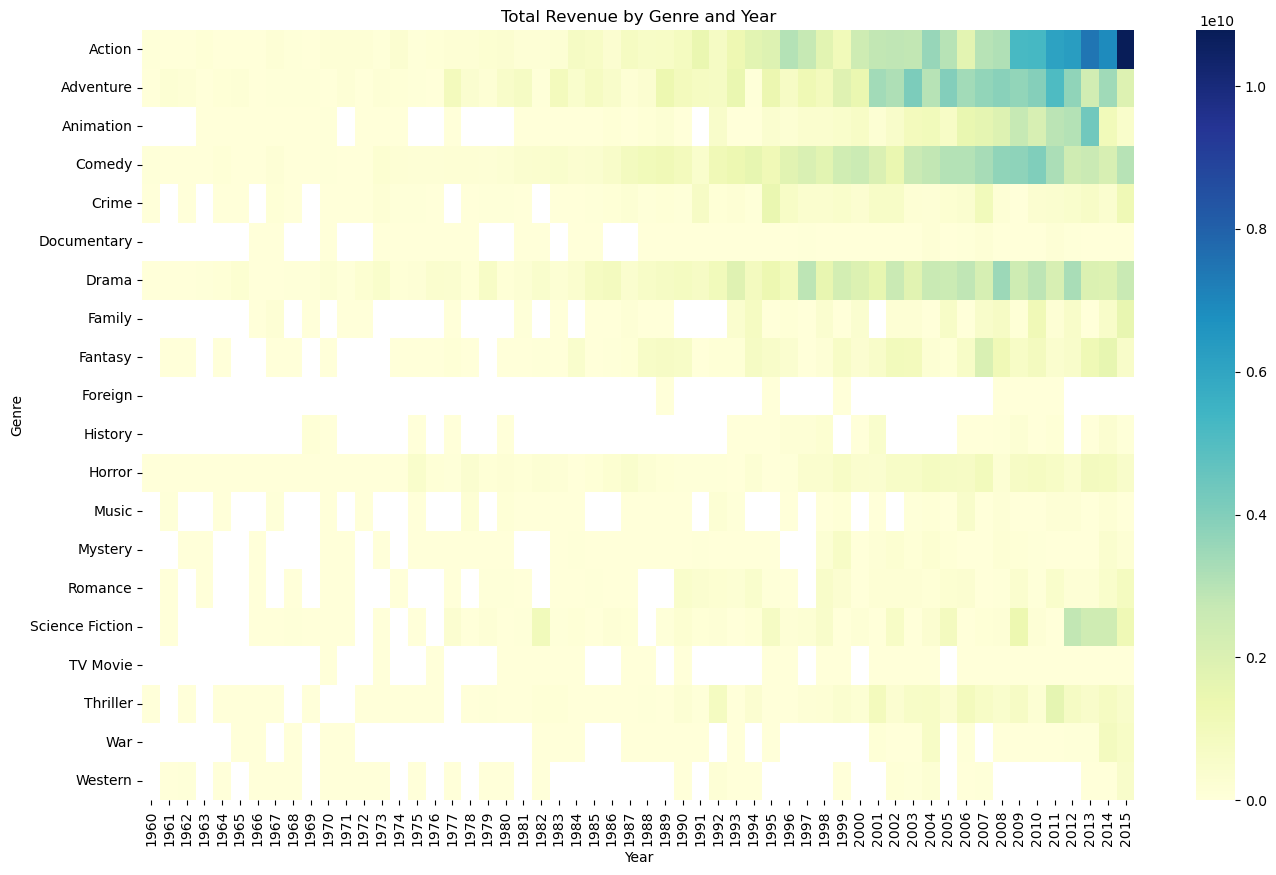

In [46]:
genre_year_df = df.groupby([df.release_date.dt.year, 'primary_genre']).revenue.sum().reset_index()

genre_year_pivot = genre_year_df.pivot(index='primary_genre', columns='release_date', values='revenue')

import seaborn as sns

plt.figure(figsize=(16,10))
sns.heatmap(genre_year_pivot, cmap="YlGnBu")
plt.title("Total Revenue by Genre and Year")
plt.xlabel("Year")
plt.ylabel("Genre")
plt.show()

We can see in this 'Total Revenue by Genre and Year' that the revenuw for action began to increase starting in 2009 and then became the hight in revenue in 2015. 

<a id='rq7'></a>
### Research Question 7 - When reviewing all the dataframes showing the top Directors using various metrics how frequently does each Director appear in the top 20? 

In [47]:
director_freq = {}

# Loop through each dataframe and count the frequency of each director in the top 20
for df in [sorted_dgg, pop_by_genre, high_low_pop_score, pop_by_director, high_low_by_director, top_all_time]:
    if 'director' in df.columns:
        director_col = 'director'
    elif 'director_primary' in df.columns:
        director_col = 'director_primary'
    else:
        continue
    
    for director in df[director_col][:20]:
        if pd.isna(director):
            continue
        
        if director in director_freq:
            director_freq[director] += 1
        else:
            director_freq[director] = 1
            
# Sort the directors by their frequency in the top 20
sorted_directors = sorted(director_freq.items(), key=lambda x: x[1], reverse=True)

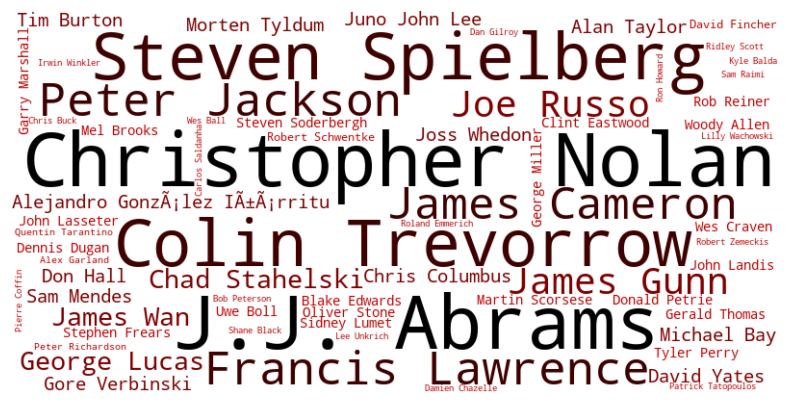

In [48]:
# Create a color function that maps each director to a color gradient based on their frequency
max_freq = max(director_freq.values())
def director_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    freq = director_freq[word]
    color = f'#{int(255*(max_freq-freq)/max_freq):02x}0000'
    return color

# Create a word cloud with a color gradient based on director frequency
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=director_color_func).generate_from_frequencies(director_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [49]:
# Create a dataframe from the sorted_directors list
df2 = pd.DataFrame(sorted_directors, columns=['director', 'frequency'])

# Create a dictionary to map each director to a color gradient based on their frequency
director_colors = {}
max_freq = df2['frequency'].max()
for i, (director, freq) in enumerate(zip(df2['director'], df2['frequency'])):
    director_colors[director] = f'rgba({int(255*i/len(df))}, 50, {int(255*(max_freq-freq)/max_freq)}, 1)'

# Create a horizontal bar chart with a color gradient based on director frequency
fig = px.bar(df2, x='frequency', y='director', orientation='h', color='director', color_discrete_map=director_colors)

fig.show()


Only 2 directors 'Christopher Nolan' and 'J.J. Abrams' appear in 4 of the different dataframes examining the differnt metrics that make a Top Director. 

<a id='conclusions'></a>
## Conclusions

There are many factors that are discussed on what makes a Director a top Director. Throughout this project I have reviewed the top Directors when measuring specific metrics. 

The metrics I used to determine whether a Director was a 'Top Director' were the following:
- The total profit (revenue - budget) a single director made for all films. *Found in the dataframe 'top_all_time'*
- Average profit per film for each Director. *Found in the dataframe 'top_all_time'*
- The average popularity score the Director recieved. *Found in the dataframe 'pop_by_director' and 'high_low_pop_score'* 
- Average popularity score by genre for each Director. *Found in the dataframe 'pop_by_genre' and 'sorted_dgg'* 
- Average profit based on genre for each Director. *Found in the dataframe 'sorted_dgg'* 
Then finally how many times a Director appeared in the Top 20 of each of the above metrics. *Found in the dataframe 'df2'* 

Based on the metrics used within the dataset provided Christopher Nolan and J.J. Abrams could be considered the Top Directors. They are the only Directors to appear in 4 of the 6 dataframe metrics noted above. 

We can also infer that Action is the highest profit and highest in popularity. So Directors that make more Action films may appear to be 'Top Directors' because the genre has a high popularity and popularity and profit often coenside as seen with dataframe 'pop_by_genre'. 

### Limitation

The data is limited as there are very few Foregin films or Directors noted within the dataset. While assuming the dataset is accurate we are not getting a deep look into the other directors and films produced. 

I had to make assumptions on the meaning of the columns 'popularity'. 

I addressed the concern for inflation skewing the data. 


## OPTIONAL: Question for the reviewer
 
If you have any question about the starter code or your own implementation, please add it in the cell below. 

For example, if you want to know why a piece of code is written the way it is, or its function, or alternative ways of implementing the same functionality, or if you want to get feedback on a specific part of your code or get feedback on things you tried but did not work.

Please keep your questions succinct and clear to help the reviewer answer them satisfactorily. 

> Would there have been a better way to show all of the graphs I have? When reviewing the information the way it is displayed looks less refined and potentially hard to follow. 

In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'Investigate_a_Dataset.ipynb' matched no files


255